In [1]:
sentence = "Your journey starts with one step"
print(sentence)

Your journey starts with one step


In [2]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

(0.0, 1.0)

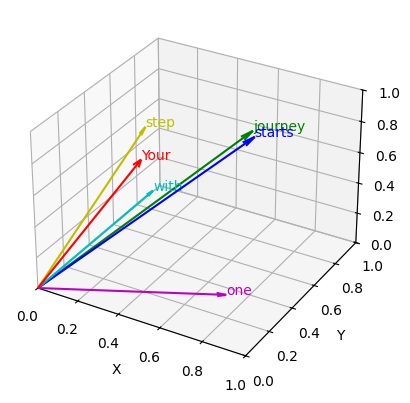

In [ ]:
## Token Embeddings visualized

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

In [8]:
## Context vectors are enriched token embeddings which also contain contextual information of the other tokens in the sentence. For every token, it is computed by multiplying the attention weight of each of the other tokens with their respective token embeddings and summing them up. (Like a vector sum of the weighted token embeddings)

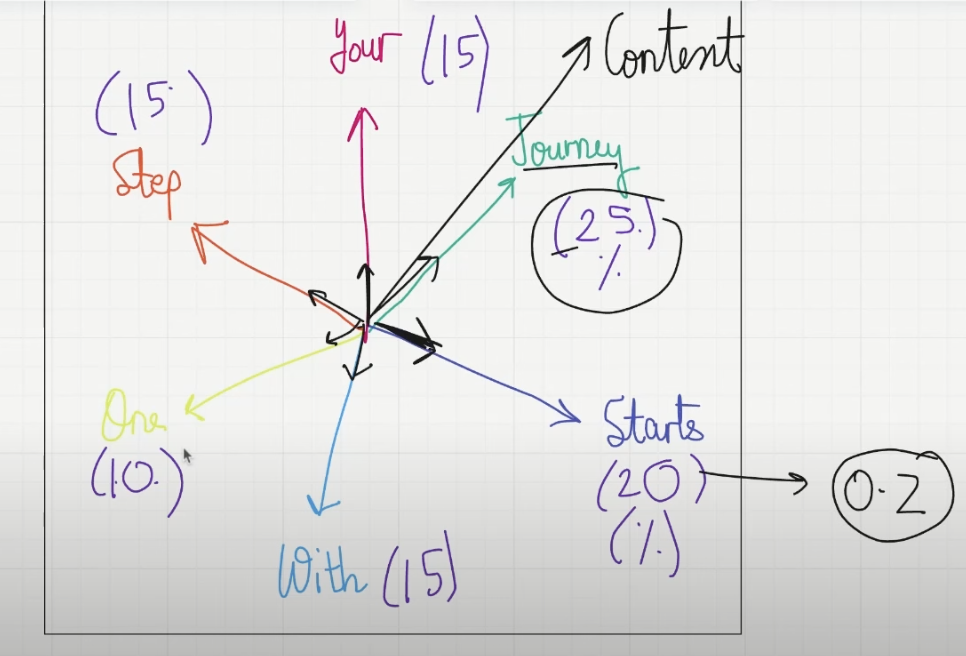

For the token journey, the attention weights scale down each of the token embeddings for the other tokens, and the final context vector for journey is computed by the sum of all the scaled down token embeddings of the other tokens

In [ ]:
## How much each token attends to every other token in the sentence is computed by taking the dot product of their embeddings. This gives us a matrix of attention scores, where each element represents how much one token attends to another. (This is a simplified version of the attention mechanism used in transformers.). Using dot product is insufficient as it means only similar meaning tokens (similar vectors) will have higher attention scores, but we want to capture relationships between all tokens, even if they are not similar in meaning.

attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [6]:
## Adding softmax to the attention scores to get attention weights to create a pdf over tokens for interpretability.

attn_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [ ]:
## This is like saying for each token, we do a weighted sum of all the token embeddings, where the weights are given by the attention scores. This gives us a context vector for each token that captures its relationship with all other tokens in the sentence.

all_context_vecs = attn_weights @ inputs ## Each row is the enriched token embedding i.e. context vector
print(all_context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
